# Clean a dataset by removing missing values and outliers.


In [4]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#import the datasets
df = pd.read_csv("Titanic_dataset.csv")

In [8]:
#first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
#drop column
df.drop(["PassengerId", "Ticket"], axis=1, inplace=True)

In [11]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [12]:
df.shape

(891, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [14]:
# Check duplicate values
df.duplicated().sum()

0

In [16]:
#checking null value
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
#calculate the mean age of male passengers
mean_male = df[df["Sex"]=="male"]["Age"].mean()
mean_male

30.72664459161148

In [22]:
#calculate the mean age of female passengers
mean_female = df[df["Sex"]=="female"]["Age"].mean()
mean_female

27.915708812260537

# Filling the null values

In [25]:
df.loc[df["Sex"] == "male", "Age"] = df[df["Sex"]=="male"]["Age"].fillna(mean_male)

In [26]:
df.loc[df["Sex"] == "female", "Age"] = df[df["Sex"]=="female"]["Age"].fillna(mean_female)

In [27]:
#find the Null values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [28]:
eb_mode = df["Embarked"].mode()
eb_mode[0]

'S'

In [29]:
df["Embarked"]=df["Embarked"].fillna(eb_mode[0])

In [31]:
df.drop("Cabin", axis = 1, inplace=True)

<AxesSubplot:>

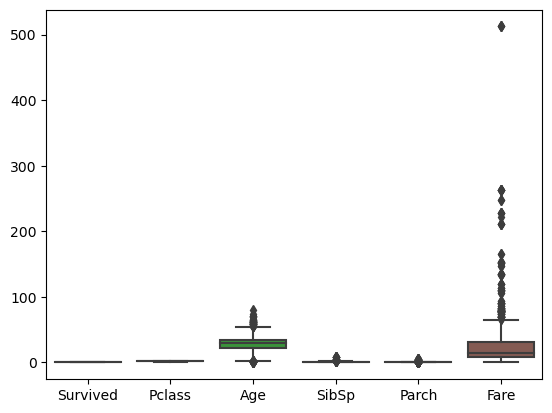

In [32]:
sns.boxplot(data = df)

In [33]:
num_col = df.select_dtypes(exclude="object")

# Removing Outliers

In [35]:
# Removing Outlier using 5 number summary
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3-Q1
    

In [36]:
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)

In [37]:
df.loc[(df[col]>upper_limit),col] = upper_limit
df.loc[(df[col]<lower_limit),col] = lower_limit

Survived
****************************************************************************************************


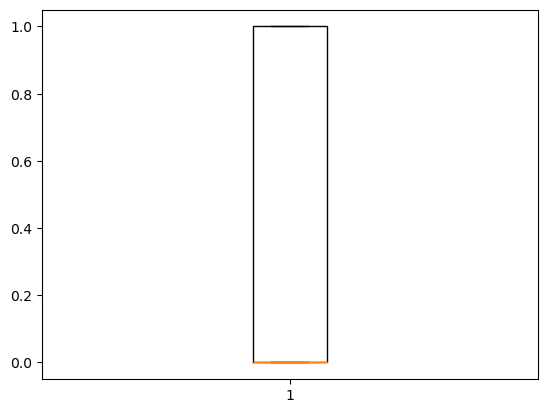

Pclass
****************************************************************************************************


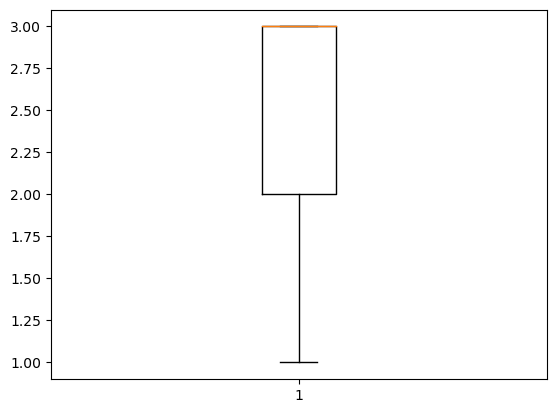

Age
****************************************************************************************************


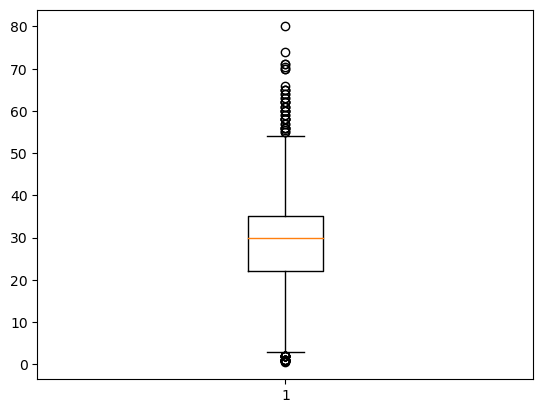

SibSp
****************************************************************************************************


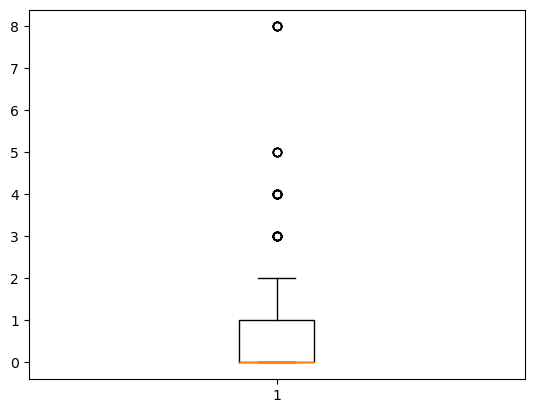

Parch
****************************************************************************************************


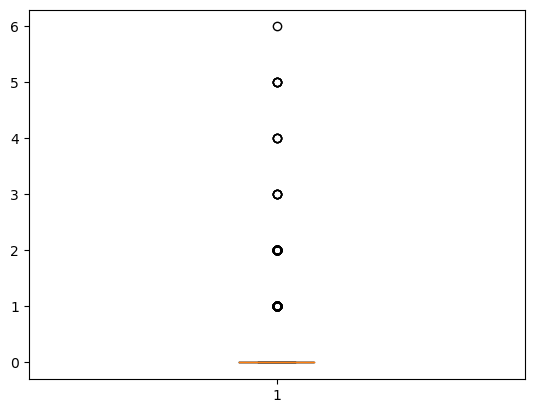

Fare
****************************************************************************************************


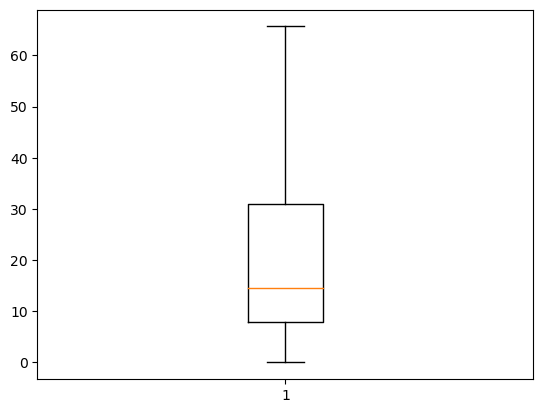

In [38]:
for col in num_col:
    print(col)
    print("*" * 100)
    plt.boxplot(x=df[col])
    plt.show()